In [1]:
#Demo of sigmoid function
#Formula of sigmpoid function :-y=1/(1+exp(-x))
'''
why we are learning a sigmoid function?
ans->Because sigmoid function gives the output always in between 0 & 1 and many
       plots the graph of sigmoid function it gives an 's' shaped curve.
'''

"\nwhy we are learning a sigmoid function?\nans->Because sigmoid function gives the output always in between 0 & 1 and many\n       plots the graph of sigmoid function it gives an 's' shaped curve.\n"

In [2]:
import numpy as np
#Create a user define function
def sigmoid(X): #here x input and sigmoid user defined function
    return 1/(1+np.exp(-X))

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]


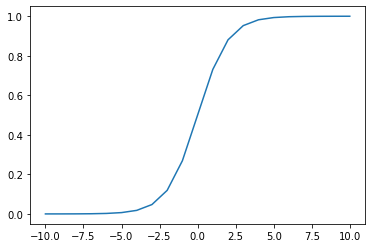

In [3]:
#Main program
#Create 1d numpy array
X=np.arange(-10,11) #start=-10 stop=11 means 11-1=10 step=+1 by default
print(X)
#Call sigmoid function
Y=sigmoid(X)
print(Y)
#plot the input and output 
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.show()

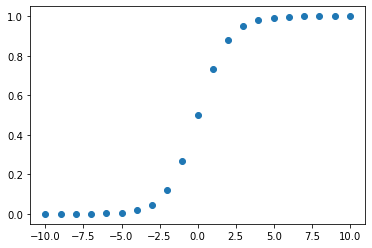

In [4]:
#Scatter plot
plt.scatter(X,Y)
plt.show()

# Logistic Regression :-Practical

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#To load data set
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
#To check  null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
df.shape #How many rows and column

(1338, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [10]:
#Here target variable is insuranceclaim which want to predict
#If customer claim insurance: means predict yes means 1 otherwise no means 0
#Claim means 1 
#No claim means 0
#This dataset is classification dataset , slove this dataset by classification algorithm
#First use logistic regression

In [11]:
#Sepratae the input(independent variable) and output means target variable
X=df.drop("insuranceclaim",axis=1) #input selection
Y=df["insuranceclaim"] #output

In [12]:
#Or 
#X=df.iloc[:,:-1] #select input
#Y=df.iloc[:,-1] #select output

In [13]:
#X it will return all input columns
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
#Y means output 
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [15]:
df["insuranceclaim"].unique()

array([1, 0], dtype=int64)

In [16]:
#Now we proceed
#train_test_split
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.head()

,age,sex,bmi,children,smoker,region,charges
744,50,1,26.41,0,0,1,8827.2099
363,21,0,26.40,1,0,3,2597.7790
10,25,1,26.22,0,0,0,2721.3208
970,50,0,28.16,3,0,2,10702.6424
634,51,1,39.70,1,0,3,9391.3460


# Create a baseline model (Logistic Regression)

In [18]:
from sklearn.linear_model import LogisticRegression
#Similar to LinearRegressioin

In [19]:
#Create the object of LogisticRegression class
lr=LogisticRegression()

In [20]:
#Theory of all Alogrthim is different but practical will be same
#Train the model , use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [21]:
#Test the model we use predict() inbuilt method of LinearRegression
#Predict() : Y_pred=1/(1+exp(-X))
Y_pred=lr.predict(X_test)
Y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [22]:
#How the exact 1 & 0--> np.where(Y_pred>=0.5) True=1 and False=0

In [23]:
#Total testing data in Y
Y_test.shape

(402,)

In [24]:
d={'Actual Output': Y_test,'Predicted Output':Y_pred}
new_df=pd.DataFrame(d)
new_df.head(10)

,Actual Output,Predicted Output
559,1,1
1087,1,1
1020,1,1
460,0,0
802,0,0
298,1,1
481,1,0
616,1,1
763,1,1
750,1,1


In [25]:
#Findout thn score it is also known as accuracy-score
#score() inbuilt method of Logistic Regression
lr.score(X_test,Y_test)
# It nearest to 1 which means accuarcy is very good
#Accuracy score is always good. most of the time, it is very good.
#means we sholuld not depend only accuarcy score
#we also check recall, precision,f1-score

0.8059701492537313

In [26]:
#recall=TP/(TP+FN)-->Horizontal
#Precision=TP/(TP+FP)-->Vertical
#F1-score=F1 score is the Harmonic mean of recall and precision H.M means harmonic mean

In [27]:
#Suppose we have 2nos. A and B 
#Find arithmetic mean AM=(A+B)/2
#HM is the average of the resipocal of the numbers
#recipocal of number A=1/A
#recipocal of number B=1/B
#HM=(1/A+1/B)/2

In [28]:
#Evaluation Matrix:-
#Learn a confusion matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [29]:
accuracy_score(Y_test,Y_pred) #similar to score() of logistic reghression

0.8059701492537313

In [30]:
recall_score(Y_test,Y_pred)

0.8653061224489796

In [71]:
precision_score(Y_test,Y_pred)

0.9877551020408163

In [72]:
f1_score(Y_test,Y_pred)

0.9877551020408163

In [31]:
#classification_report() inbuilt function which define in classification_report class
from sklearn.metrics import classification_report

In [32]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.81       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.81      0.80       402



In [33]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(Y_test,Y_pred)

array([[112,  45],
       [ 33, 212]], dtype=int64)

In [35]:
#With the help of ravel() we can change 2D array into 1d array
confusion_matrix(Y_test,Y_pred).ravel()

array([112,  45,  33, 212], dtype=int64)

In [36]:
TP,FP,FN,TN=confusion_matrix(Y_test,Y_pred).ravel()
print("True Positive :",TP)
print("False Positive :",FP)
print("False negative :",FN)
print("True negative :",TN)

True Positive : 112
False Positive : 45
False negative : 33
True negative : 212


In [37]:
#First Analysis
#Feature selection :Manually
#Use visualisation for feature selection 

In [38]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [39]:
#we have categorical input data means categorical columns : sex ,children ,
#smoker,and region  : apply countplot() for data analysis 
#(countplot means frequency)
#and Numerical input columns : age,bmi,charges apply scatterplot()

In [40]:
df.shape

(1338, 8)

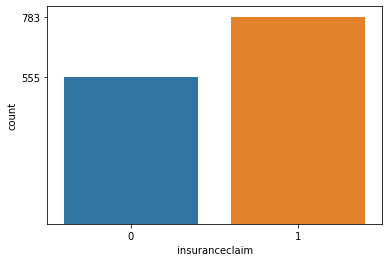

In [41]:
#First : check how many customer to claim the insurance means target variable insuranceclaim
sb.countplot(data=df,x='insuranceclaim')
c=df['insuranceclaim'].value_counts()
plt.yticks(c)
plt.show()

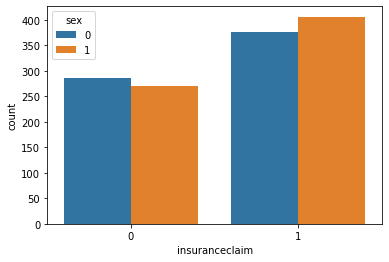

In [42]:
#first check 'sex' is important input features or not to predict the o/p
sb.countplot(data=df,x='insuranceclaim',hue='sex')
plt.show()

In [43]:
#In the above graph 'sex' is not important input features to predict the output

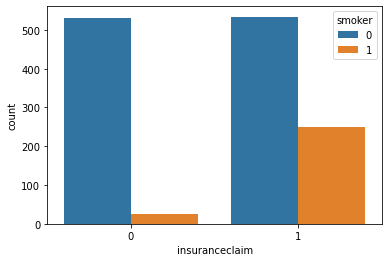

In [44]:
#second check 'smoker' is important input features or not to predict the o/p
sb.countplot(data=df,x='insuranceclaim',hue='smoker')
plt.show()

In [45]:
#In the above graph 'smoker' is important input features to predict the output

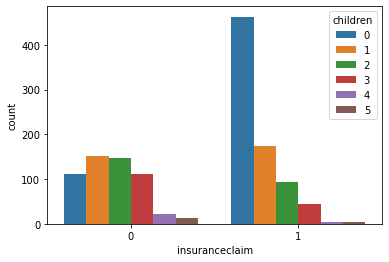

In [46]:
#third check 'children' is important input features or not to predict the o/p
sb.countplot(data=df,x='insuranceclaim',hue='children')
plt.show()

In [47]:
#In the above graph 'children' is important input features to predict the output

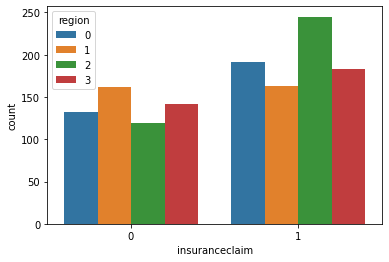

In [48]:
#fourth check 'region' is important input features or not to predict the o/p
sb.countplot(data=df,x='insuranceclaim',hue='region')
plt.show()

In [49]:
#In the above graph 'region' is not important input features to predict the output

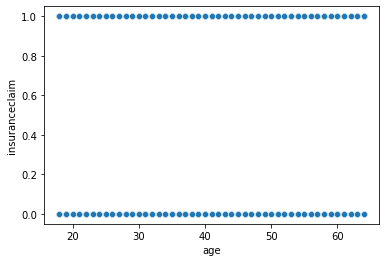

In [50]:
#Numerical input column: age,bmi,charges apply scatterplot()
sb.scatterplot(data=df,x='age',y='insuranceclaim')
plt.show()

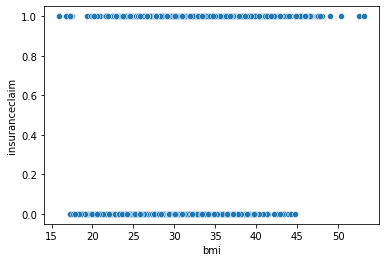

In [51]:
#Numerical input column: age,bmi,charges apply scatterplot()
sb.scatterplot(data=df,x='bmi',y='insuranceclaim')
plt.show()

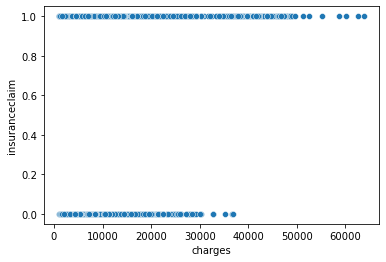

In [52]:
#Numerical input column: age,bmi,charges apply scatterplot()
sb.scatterplot(data=df,x='charges',y='insuranceclaim')
plt.show()

In [53]:
#Coclusion
#IMP INPUT
X=df[['bmi','charges','smoker','children']] #input 2D
Y=df['insuranceclaim'] #1D

In [54]:
#Train the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [57]:
#testing model
Y_Pred=lr.predict(X_test)
Y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [58]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.81       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.81      0.80       402



In [59]:
print(confusion_matrix(Y_test,Y_pred))

[[112  45]
 [ 33 212]]


# 27-12-2021

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [61]:
#Sepratae the input(independent variable) and output means target variable
X=df.drop("insuranceclaim",axis=1) #input selection
Y=df["insuranceclaim"] #output

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


# Decision Tree

In [63]:
#use decision tree classifier Algorithm
from sklearn.tree import DecisionTreeClassifier

In [64]:
#Create the object of class DecsionTreeClassifier
dt=DecisionTreeClassifier()

In [65]:
#Train the model with 70% data: use inbuilt method fit()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [66]:
#Test the model
Y_pred=dt.predict(X_test)

In [67]:
#Classification report generate for evaluation the model
print(classification_report(Y_test,Y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402

Confusion Matrix
[[154   3]
 [  3 242]]


In [68]:
#show important features
dt.feature_importances_

array([0.0701922 , 0.        , 0.42187374, 0.3335719 , 0.16581384,
       0.        , 0.00854832])

In [69]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

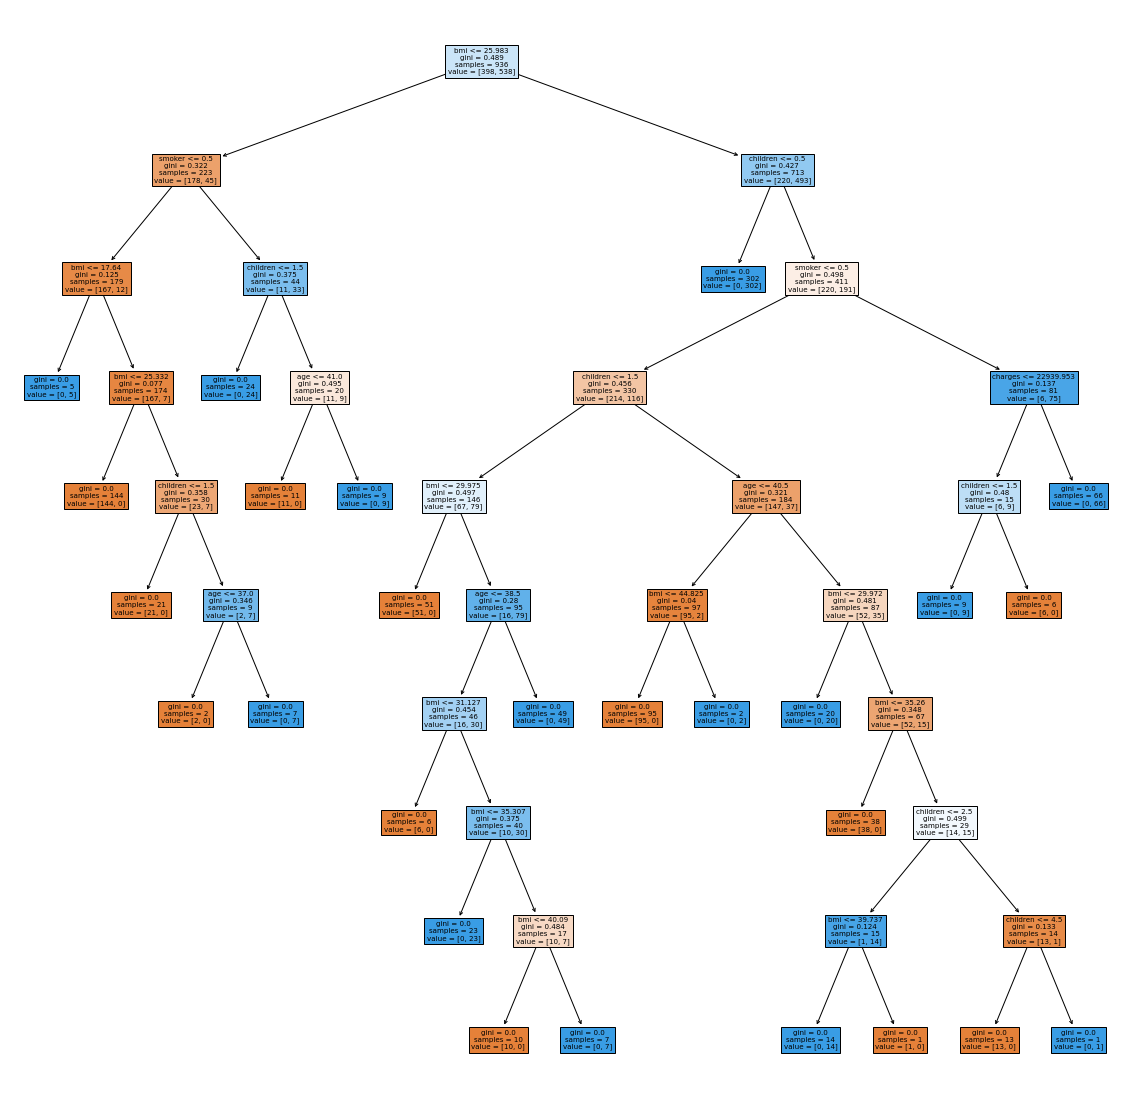

In [70]:
#Create tree 
from sklearn import tree
feature=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=feature,filled=True)